In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
sns.set_style("darkgrid")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,f1_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from  sklearn.preprocessing import StandardScaler

from sklearn import tree

In [3]:
df = pd.read_csv(r"C:\Users\USER\Downloads\PCOS.csv")

In [4]:
df.shape

(541, 42)

In [5]:
df.head()

Age  Weight  Height   BMI  BG  Pulserate  RR     Hb  Cycle  Cyclelength  \
0   28    44.6   152.0  19.3  15         78  22  10.48      2            5   
1   36    65.0   161.5  24.9  15         74  20  11.70      2            5   
2   33    68.8   165.0  25.3  11         72  18  11.80      2            5   
3   37    65.0   148.0  29.7  13         72  20  12.00      2            5   
4   25    52.0   161.0  20.1  11         72  18  10.00      2            5   

   ...  Fastfood  RegExercise  BPSystolic  BPDiastolic  FollicleNoL  \
0  ...         1            0         110           80            3   
1  ...         0            0         120           70            3   
2  ...         1            0         120           80           13   
3  ...         0            0         120           70            2   
4  ...         0            0         120           80            3   

   FollicleNoR  AvgFsizeL  AvgFsizeR  Endometrium  target  
0            3       18.0       18.0          8.5       0  
1            5       15.0       14.0          3.7       0  
2           15       18.0       20.0         10.0       1  
3            2       15.0       14.0          7.5       0  
4            4       16.0       14.0          7.0       0  

[5 rows x 42 columns]

In [6]:
df.tail()

Age  Weight   Height   BMI  BG  Pulserate  RR    Hb  Cycle  Cyclelength  \
536   35    50.0  164.592  18.5  17         72  16  11.0      2            5   
537   30    63.2  158.000  25.3  15         72  18  10.8      2            5   
538   36    54.0  152.000  23.4  13         74  20  10.8      2            6   
539   27    50.0  150.000  22.2  15         74  20  12.0      4            2   
540   23    82.0  165.000  30.1  13         80  20  10.2      4            7   

     ...  Fastfood  RegExercise  BPSystolic  BPDiastolic  FollicleNoL  \
536  ...         0            0         110           70            1   
537  ...         0            0         110           70            9   
538  ...         0            0         110           80            1   
539  ...         0            0         110           70            7   
540  ...         1            0         120           70            9   

     FollicleNoR  AvgFsizeL  AvgFsizeR  Endometrium  target  
536            0       17.5       10.0          6.7       0  
537            7       19.0       18.0          8.2       0  
538            0       18.0        9.0          7.3       0  
539            6       18.0       16.0         11.5       0  
540           10       19.0       18.0          6.9       1  

[5 rows x 42 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            541 non-null    int64  
 1   Weight         541 non-null    float64
 2   Height         541 non-null    float64
 3   BMI            541 non-null    float64
 4   BG             541 non-null    int64  
 5   Pulserate      541 non-null    int64  
 6   RR             541 non-null    int64  
 7   Hb             541 non-null    float64
 8   Cycle          541 non-null    int64  
 9   Cyclelength    541 non-null    int64  
 10  MS             541 non-null    float64
 11  Pregnant       541 non-null    int64  
 12  abortions      541 non-null    int64  
 13  IBH            541 non-null    float64
 14  IBHG           541 non-null    float64
 15  FSH            541 non-null    float64
 16  LH             541 non-null    float64
 17  FSHbyLH        541 non-null    float64
 18  Hip       

In [62]:
df.describe()

Age      Weight      Height         BMI          BG   Pulserate  \
count  541.000000  541.000000  541.000000  541.000000  541.000000  541.000000   
mean    31.430684   59.637153  156.484835   24.307579   13.802218   73.247689   
std      5.411006   11.028287    6.033545    4.055129    1.840812    4.430285   
min     20.000000   31.000000  137.000000   12.400000   11.000000   13.000000   
25%     28.000000   52.000000  152.000000   21.600000   13.000000   72.000000   
50%     31.000000   59.000000  156.000000   24.200000   14.000000   72.000000   
75%     35.000000   65.000000  160.000000   26.600000   15.000000   74.000000   
max     48.000000  108.000000  180.000000   38.900000   18.000000   82.000000   

               RR          Hb       Cycle  Cyclelength  ...    Fastfood  \
count  541.000000  541.000000  541.000000    541.00000  ...  541.000000   
mean    19.243993   11.160037    2.560074      4.94085  ...    0.515712   
std      1.688629    0.866904    0.901950      1.49202  ...    0.500216   
min     16.000000    8.500000    2.000000      0.00000  ...    0.000000   
25%     18.000000   10.500000    2.000000      4.00000  ...    0.000000   
50%     18.000000   11.000000    2.000000      5.00000  ...    1.000000   
75%     20.000000   11.700000    4.000000      5.00000  ...    1.000000   
max     28.000000   14.800000    5.000000     12.00000  ...    1.000000   

       RegExercise  BPSystolic  BPDiastolic  FollicleNoL  FollicleNoR  \
count   541.000000  541.000000   541.000000   541.000000   541.000000   
mean      0.247689  114.661738    76.927911     6.129390     6.641405   
std       0.432070    7.384556     5.574112     4.229294     4.436889   
min       0.000000   12.000000     8.000000     0.000000     0.000000   
25%       0.000000  110.000000    70.000000     3.000000     3.000000   
50%       0.000000  110.000000    80.000000     5.000000     6.000000   
75%       0.000000  120.000000    80.000000     9.000000    10.000000   
max       1.000000  140.000000   100.000000    22.000000    20.000000   

        AvgFsizeL   AvgFsizeR  Endometrium      target  
count  541.000000  541.000000   541.000000  541.000000  
mean    15.018115   15.451701     8.475915    0.327172  
std      3.566839    3.318848     2.165381    0.469615  
min      0.000000    0.000000     0.000000    0.000000  
25%     13.000000   13.000000     7.000000    0.000000  
50%     15.000000   16.000000     8.500000    0.000000  
75%     18.000000   18.000000     9.800000    1.000000  
max     24.000000   24.000000    18.000000    1.000000  

[8 rows x 41 columns]

In [63]:
df.isnull()

Age  Weight  Height    BMI     BG  Pulserate     RR     Hb  Cycle  \
0    False   False   False  False  False      False  False  False  False   
1    False   False   False  False  False      False  False  False  False   
2    False   False   False  False  False      False  False  False  False   
3    False   False   False  False  False      False  False  False  False   
4    False   False   False  False  False      False  False  False  False   
..     ...     ...     ...    ...    ...        ...    ...    ...    ...   
536  False   False   False  False  False      False  False  False  False   
537  False   False   False  False  False      False  False  False  False   
538  False   False   False  False  False      False  False  False  False   
539  False   False   False  False  False      False  False  False  False   
540  False   False   False  False  False      False  False  False  False   

     Cyclelength  ...  Fastfood  RegExercise  BPSystolic  BPDiastolic  \
0          False  ...     False        False       False        False   
1          False  ...     False        False       False        False   
2          False  ...     False        False       False        False   
3          False  ...     False        False       False        False   
4          False  ...     False        False       False        False   
..           ...  ...       ...          ...         ...          ...   
536        False  ...     False        False       False        False   
537        False  ...     False        False       False        False   
538        False  ...     False        False       False        False   
539        False  ...     False        False       False        False   
540        False  ...     False        False       False        False   

     FollicleNoL  FollicleNoR  AvgFsizeL  AvgFsizeR  Endometrium  target  
0          False        False      False      False        False   False  
1          False        False      False      False        False   False  
2          False        False      False      False        False   False  
3          False        False      False      False        False   False  
4          False        False      False      False        False   False  
..           ...          ...        ...        ...          ...     ...  
536        False        False      False      False        False   False  
537        False        False      False      False        False   False  
538        False        False      False      False        False   False  
539        False        False      False      False        False   False  
540        False        False      False      False        False   False  

[541 rows x 42 columns]

In [64]:
df.isnull().sum()

Age              0
Weight           0
Height           0
BMI              0
BG               0
Pulserate        0
RR               0
Hb               0
Cycle            0
Cyclelength      0
MS               0
Pregnant         0
abortions        0
IBH              0
IBHG             0
FSH              0
LH               0
FSHbyLH          0
Hip              0
Waist            0
WaistHipRatio    0
TSH              0
A                0
PRL              0
VitD3            0
PRG              0
RBS              0
Weightgain       0
hairgrowth       0
Skindarkening    0
Hairloss         0
Pimples          0
Fastfood         0
RegExercise      0
BPSystolic       0
BPDiastolic      0
FollicleNoL      0
FollicleNoR      0
AvgFsizeL        0
AvgFsizeR        0
Endometrium      0
target           0
dtype: int64

D:\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MS'>

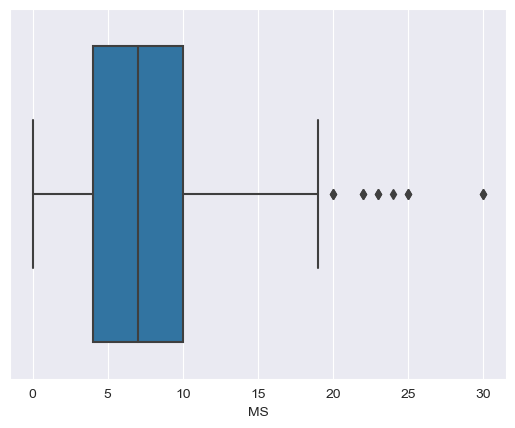

In [65]:
sns.boxplot(df.MS)

D:\Anoconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS', ylabel='Density'>

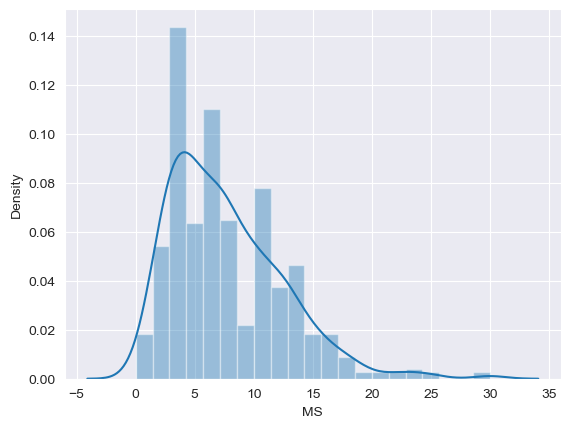

In [66]:
sns.distplot(df.MS)

D:\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fastfood'>

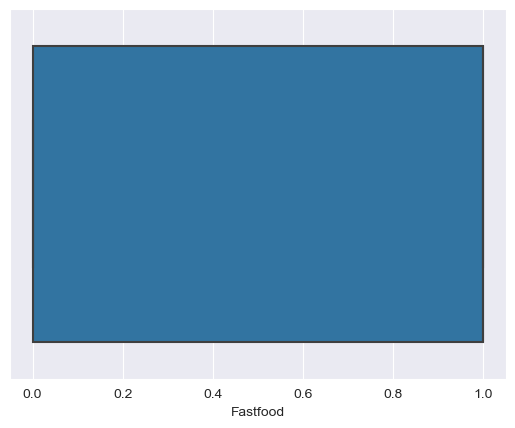

In [67]:
sns.boxplot(df.Fastfood)

D:\Anoconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fastfood', ylabel='Density'>

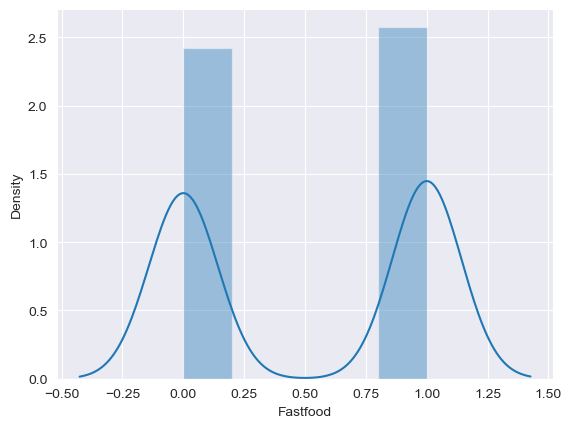

In [68]:
sns.distplot(df.Fastfood)

In [71]:
df.Fastfood.mode()

0    1
Name: Fastfood, dtype: int64

In [72]:
df.MS.mode()

0    4.0
Name: MS, dtype: float64

In [73]:
df.isnull().sum()

Age              0
Weight           0
Height           0
BMI              0
BG               0
Pulserate        0
RR               0
Hb               0
Cycle            0
Cyclelength      0
MS               0
Pregnant         0
abortions        0
IBH              0
IBHG             0
FSH              0
LH               0
FSHbyLH          0
Hip              0
Waist            0
WaistHipRatio    0
TSH              0
A                0
PRL              0
VitD3            0
PRG              0
RBS              0
Weightgain       0
hairgrowth       0
Skindarkening    0
Hairloss         0
Pimples          0
Fastfood         0
RegExercise      0
BPSystolic       0
BPDiastolic      0
FollicleNoL      0
FollicleNoR      0
AvgFsizeL        0
AvgFsizeR        0
Endometrium      0
target           0
dtype: int64

In [74]:
df.at[458,'MS']

4.0

In [75]:
df.at[156,'Fastfood']

1

In [76]:
df=df.apply(pd.to_numeric,errors='coerce')
df.fillna(0,inplace=True)

In [77]:
df['BG'].replace([11,12,13,14,15,16,17,18],[1,2,3,4,5,6,7,8],inplace=True)

In [78]:
newdf=df[["Pregnant","abortions","Weightgain","BG","hairgrowth","Skindarkening","Hairloss","Pimples","Fastfood","RegExercise","target"]]

In [79]:
newdf

Pregnant  abortions  Weightgain  BG  hairgrowth  Skindarkening  Hairloss  \
0           0          0           0   5           0              0         0   
1           1          0           0   5           0              0         0   
2           1          0           0   1           0              0         1   
3           0          0           0   3           0              0         0   
4           1          0           0   1           0              0         1   
..        ...        ...         ...  ..         ...            ...       ...   
536         0          1           0   7           0              0         0   
537         1          1           1   5           0              0         0   
538         0          0           0   3           0              0         0   
539         0          0           0   5           0              0         0   
540         0          0           1   3           1              1         1   

     Pimples  Fastfood  RegExercise  target  
0          0         1            0       0  
1          0         0            0       0  
2          1         1            0       1  
3          0         0            0       0  
4          0         0            0       0  
..       ...       ...          ...     ...  
536        0         0            0       0  
537        0         0            0       0  
538        0         0            0       0  
539        1         0            0       0  
540        1         1            0       1  

[541 rows x 11 columns]

In [80]:
x=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1]

In [81]:
x.shape,y.shape

((541, 10), (541,))

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=4)


In [83]:
mi=mutual_info_classif(x_train,y_train)

In [84]:
len(mi)

10

In [85]:
mi

array([0.01767154, 0.04325454, 0.08278655, 0.        , 0.08846424,
       0.11062146, 0.01698544, 0.04427694, 0.07226981, 0.02512523])

In [86]:
mi=pd.Series(mi)
mi.index=x_train.columns

In [87]:
mi.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

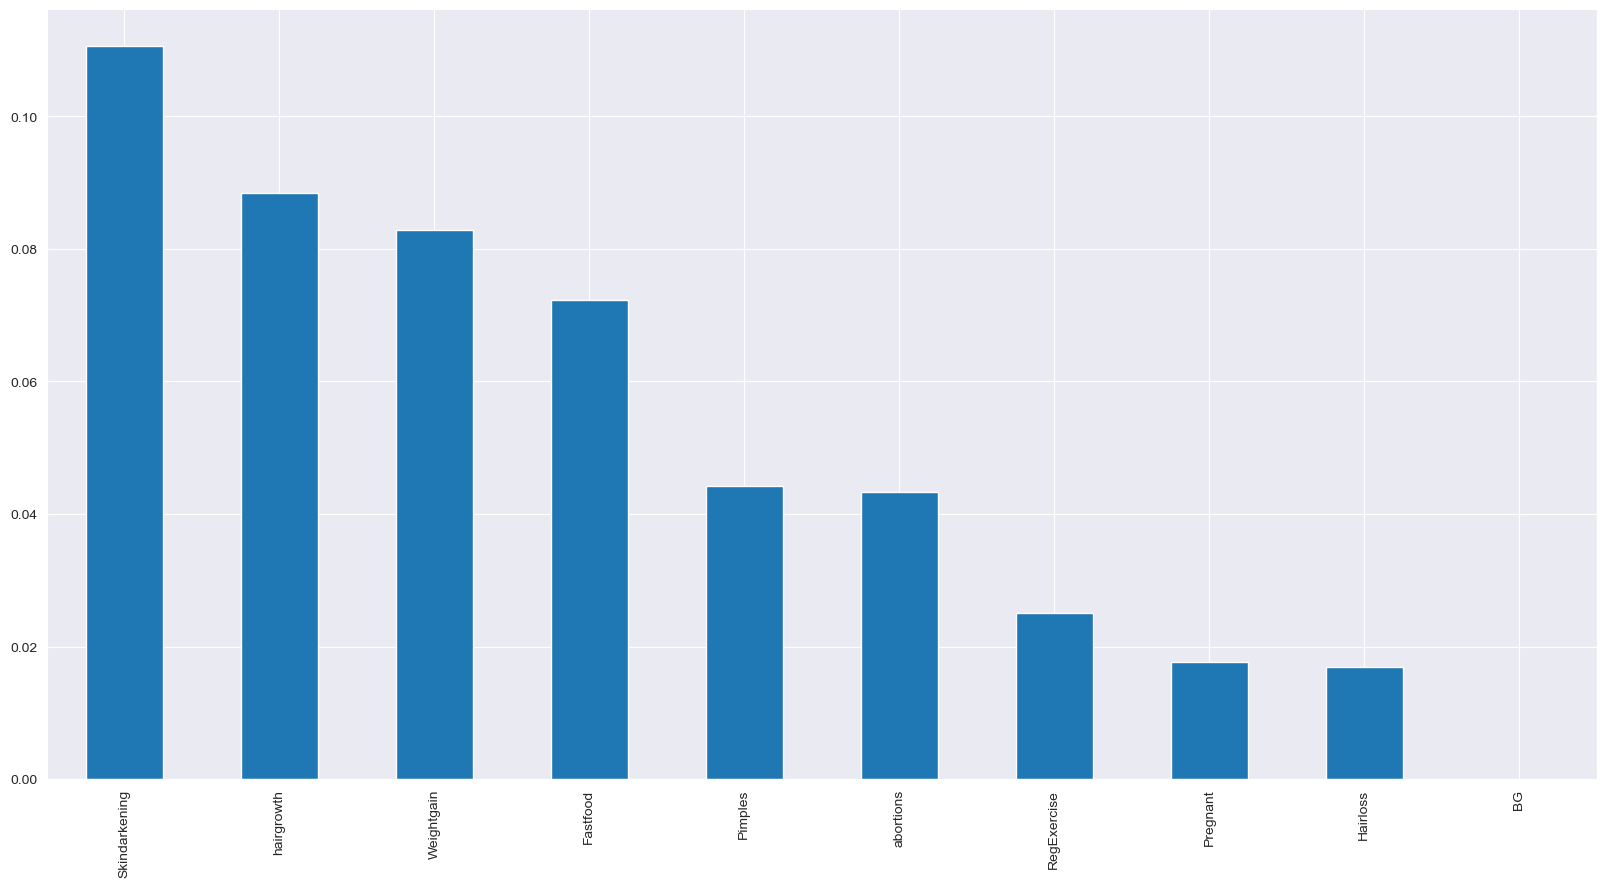

In [88]:
mi.plot.bar(figsize=(20,10))

# Do F-Test

In [89]:
from sklearn.feature_selection import chi2

In [90]:
f_score=chi2(x_train,y_train)

In [91]:
f_score

(array([ 0.12465374,  1.64071557, 47.44281019,  0.28244815, 75.72863588,
        70.08159873,  7.80427693, 20.01209493, 32.1393135 ,  1.10130183]),
 array([7.24040937e-01, 2.00227317e-01, 5.66322791e-12, 5.95101087e-01,
        3.25453395e-18, 5.69012990e-17, 5.21227187e-03, 7.69538770e-06,
        1.43503863e-08, 2.93980585e-01]))

In [92]:
p_values=pd.Series(f_score[1],index=x_train.columns)
p_values.sort_values(ascending=True,inplace=True)

In [93]:
p_values

hairgrowth       3.254534e-18
Skindarkening    5.690130e-17
Weightgain       5.663228e-12
Fastfood         1.435039e-08
Pimples          7.695388e-06
Hairloss         5.212272e-03
abortions        2.002273e-01
RegExercise      2.939806e-01
BG               5.951011e-01
Pregnant         7.240409e-01
dtype: float64

<AxesSubplot:>

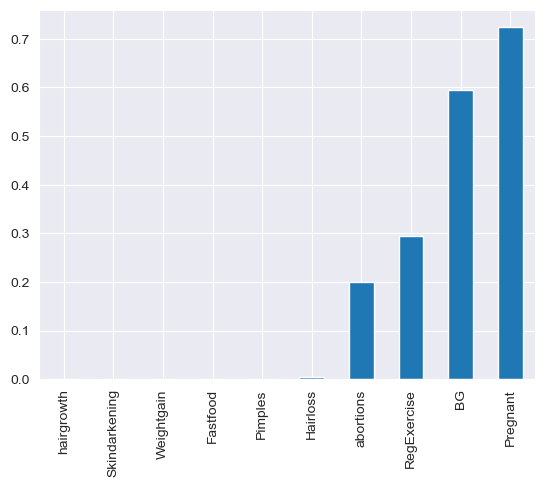

In [94]:
p_values.plot.bar()

In [95]:
p_values=p_values[p_values<0.05]

In [96]:
p_values.index

Index(['hairgrowth', 'Skindarkening', 'Weightgain', 'Fastfood', 'Pimples',
       'Hairloss'],
      dtype='object')

# ANOVA

In [97]:
df=df.drop(['Pregnant','abortions','Weightgain','BG','hairgrowth','Skindarkening','Hairloss','Pimples','Fastfood','RegExercise'],axis=1)

In [98]:
df

Age  Weight   Height   BMI  Pulserate  RR     Hb  Cycle  Cyclelength  \
0     28    44.6  152.000  19.3         78  22  10.48      2            5   
1     36    65.0  161.500  24.9         74  20  11.70      2            5   
2     33    68.8  165.000  25.3         72  18  11.80      2            5   
3     37    65.0  148.000  29.7         72  20  12.00      2            5   
4     25    52.0  161.000  20.1         72  18  10.00      2            5   
..   ...     ...      ...   ...        ...  ..    ...    ...          ...   
536   35    50.0  164.592  18.5         72  16  11.00      2            5   
537   30    63.2  158.000  25.3         72  18  10.80      2            5   
538   36    54.0  152.000  23.4         74  20  10.80      2            6   
539   27    50.0  150.000  22.2         74  20  12.00      4            2   
540   23    82.0  165.000  30.1         80  20  10.20      4            7   

       MS  ...   PRG    RBS  BPSystolic  BPDiastolic  FollicleNoL  \
0     7.0  ...  0.57   92.0         110           80            3   
1    11.0  ...  0.97   92.0         120           70            3   
2    10.0  ...  0.36   84.0         120           80           13   
3     4.0  ...  0.36   76.0         120           70            2   
4     1.0  ...  0.38   84.0         120           80            3   
..    ...  ...   ...    ...         ...          ...          ...   
536   8.0  ...  0.25   92.0         110           70            1   
537   4.0  ...  0.25  108.0         110           70            9   
538   8.0  ...  0.25   92.0         110           80            1   
539   2.0  ...  0.25  115.0         110           70            7   
540   2.0  ...  0.37  108.0         120           70            9   

     FollicleNoR  AvgFsizeL  AvgFsizeR  Endometrium  target  
0              3       18.0       18.0          8.5       0  
1              5       15.0       14.0          3.7       0  
2             15       18.0       20.0         10.0       1  
3              2       15.0       14.0          7.5       0  
4              4       16.0       14.0          7.0       0  
..           ...        ...        ...          ...     ...  
536            0       17.5       10.0          6.7       0  
537            7       19.0       18.0          8.2       0  
538            0       18.0        9.0          7.3       0  
539            6       18.0       16.0         11.5       0  
540           10       19.0       18.0          6.9       1  

[541 rows x 32 columns]

In [99]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [100]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
cols=x.columns
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=cols)
x

Age    Weight    Height       BMI  Pulserate        RR        Hb  \
0   -0.634606 -1.364770 -0.744005 -1.236018   1.073680  1.633608 -0.785169   
1    0.845230  0.486731  0.831983  0.146227   0.169968  0.448119  0.623440   
2    0.290291  0.831618  1.412610  0.244959  -0.281888 -0.737370  0.738900   
3    1.030210  0.486731 -1.407579  1.331009  -0.281888  0.448119  0.969819   
4   -1.189545 -0.693147  0.749036 -1.038555  -0.281888 -0.737370 -1.339375   
..        ...       ...       ...       ...        ...       ...       ...   
536  0.660251 -0.874666  1.344925 -1.433482  -0.281888 -1.922858 -0.184778   
537 -0.264647  0.323363  0.251356  0.244959  -0.281888 -0.737370 -0.415698   
538  0.845230 -0.511627 -0.744005 -0.224017   0.169968  0.448119 -0.415698   
539 -0.819586 -0.874666 -1.075792 -0.520213   0.169968  0.448119  0.969819   
540 -1.559504  2.029648  1.412610  1.429740   1.525536  0.448119 -1.108456   

        Cycle  Cyclelength        MS  ...     VitD3       PRG       RBS  \
0   -0.621534     0.039681 -0.140514  ... -0.094875 -0.010760 -0.422597   
1   -0.621534     0.039681  0.693245  ...  0.032913  0.094356 -0.422597   
2   -0.621534     0.039681  0.484805  ... -0.000624 -0.065946 -0.854047   
3   -0.621534     0.039681 -0.765832  ... -0.047749 -0.065946 -1.285497   
4   -0.621534     0.039681 -1.391151  ... -0.017682 -0.060690 -0.854047   
..        ...          ...       ...  ...       ...       ...       ...   
536 -0.621534     0.039681  0.067926  ... -0.038498 -0.094852 -0.422597   
537 -0.621534     0.039681 -0.765832  ... -0.077817 -0.094852  0.440302   
538 -0.621534     0.710533  0.067926  ... -0.079263 -0.094852 -0.422597   
539  1.597936    -1.972877 -1.182712  ... -0.079552 -0.094852  0.817821   
540  1.597936     1.381386 -1.182712  ... -0.094007 -0.063318  0.440302   

     BPSystolic  BPDiastolic  FollicleNoL  FollicleNoR  AvgFsizeL  AvgFsizeR  \
0     -0.631866     0.551645    -0.740617    -0.821471   0.836776   0.768537   
1      0.723565    -1.244023    -0.740617    -0.370287  -0.005083  -0.437816   
2      0.723565     0.551645     1.626032     1.885630   0.836776   1.371714   
3      0.723565    -1.244023    -0.977282    -1.047063  -0.005083  -0.437816   
4      0.723565     0.551645    -0.740617    -0.595879   0.275536  -0.437816   
..          ...          ...          ...          ...        ...        ...   
536   -0.631866    -1.244023    -1.213947    -1.498246   0.696466  -1.644169   
537   -0.631866    -1.244023     0.679373     0.080896   1.117396   0.768537   
538   -0.631866     0.551645    -1.213947    -1.498246   0.836776  -1.945757   
539   -0.631866    -1.244023     0.206043    -0.144696   0.836776   0.165361   
540    0.723565    -1.244023     0.679373     0.757671   1.117396   0.768537   

     Endometrium  
0       0.011133  
1      -2.207618  
2       0.704493  
3      -0.451107  
4      -0.682227  
..           ...  
536    -0.820899  
537    -0.127539  
538    -0.543555  
539     1.397853  
540    -0.728451  

[541 rows x 31 columns]

In [101]:
x.shape,y.shape

((541, 31), (541,))

In [102]:
fvalue_selector=SelectKBest(f_classif,k=16)
x_kbest=fvalue_selector.fit_transform(x,y)
print();print(x_kbest)

print('Original number of features:',x.shape)
print('Reduced number of features:',x_kbest.shape)


[[-0.63460643 -1.36476953 -1.23601812 ...  0.83677604  0.76853707
   0.01113306]
 [ 0.84523012  0.48673106  0.14622709 ... -0.00508332 -0.43781578
  -2.20761818]
 [ 0.29029141  0.83161842  0.24495889 ...  0.83677604  1.3717135
   0.70449282]
 ...
 [ 0.84523012 -0.5116271  -0.22401716 ...  0.83677604 -1.94575684
  -0.54355475]
 [-0.819586   -0.87466643 -0.52021257 ...  0.83677604  0.16536065
   1.39785259]
 [-1.55950427  2.02964822  1.4297405  ...  1.11739583  0.76853707
  -0.72845069]]
Original number of features: (541, 31)
Reduced number of features: (541, 16)


In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
sel=f_classif(x_train,y_train)
sel

(array([1.69823128e+01, 1.50463798e+01, 3.11281442e+00, 1.13283667e+01,
        3.61868749e+00, 1.49157395e+00, 9.51957802e-01, 8.30436014e+01,
        1.33445052e+01, 8.29510223e+00, 1.86807340e-02, 5.24904959e-01,
        4.96625874e-01, 2.20757592e+00, 5.75037664e-01, 6.62127854e+00,
        8.88501226e+00, 1.16435819e+00, 4.43610520e-01, 3.66970347e+01,
        4.38259879e-02, 1.85152091e+00, 9.99520118e-01, 5.05029196e-01,
        9.07146148e-04, 5.21416527e-01, 2.60309726e+02, 3.30633286e+02,
        1.27090284e+01, 7.30881801e+00, 4.03554861e+00]),
 array([4.52773880e-05, 1.21325062e-04, 7.83885771e-02, 8.31867679e-04,
        5.78017863e-02, 2.22641597e-01, 3.29770020e-01, 3.07515729e-18,
        2.91164656e-04, 4.17388953e-03, 8.91349697e-01, 4.69150851e-01,
        4.81367957e-01, 1.38067091e-01, 4.48679410e-01, 1.04109496e-02,
        3.03840790e-03, 2.81168420e-01, 5.05742088e-01, 3.01484524e-09,
        8.34276839e-01, 1.74319371e-01, 3.17988914e-01, 4.77683894e-01,
      

In [104]:
#first array is f-values and the second array is p-values
p_values=pd.Series(sel[1])
p_values.index=x_train.columns
p_values.sort_values(ascending=True,inplace=True)

<AxesSubplot:>

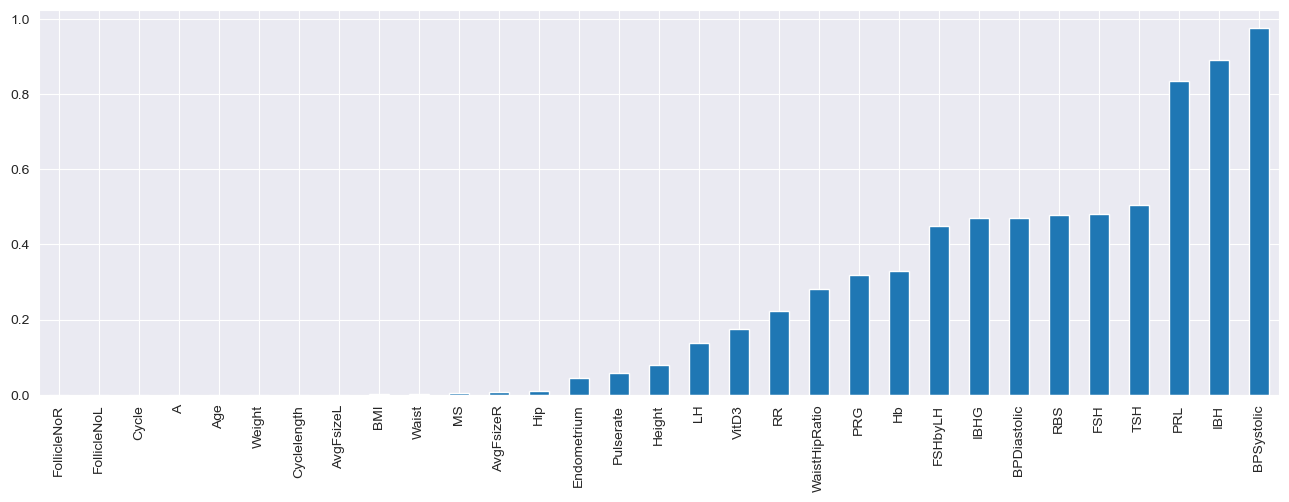

In [105]:
p_values.plot.bar(figsize=(16,5))

In [106]:
p_values=p_values[p_values<0.05]

In [107]:
p_values.index

Index(['FollicleNoR', 'FollicleNoL', 'Cycle', 'A', 'Age', 'Weight',
       'Cyclelength', 'AvgFsizeL', 'BMI', 'Waist', 'MS', 'AvgFsizeR', 'Hip',
       'Endometrium'],
      dtype='object')

In [8]:
df=pd.read_csv(r"C:\Users\USER\Downloads\final.csv")
df

FollicleNoL  FollicleNoR  Cycle     A  Age  Weight  Cyclelength  \
0              3            3      2  2.07   28    44.6            5   
1              3            5      2  1.53   36    65.0            5   
2             13           15      2  6.63   33    68.8            5   
3              2            2      2  1.22   37    65.0            5   
4              3            4      2  2.26   25    52.0            5   
..           ...          ...    ...   ...  ...     ...          ...   
536            1            0      2   1.7   35    50.0            5   
537            9            7      2   5.6   30    63.2            5   
538            1            0      2   3.7   36    54.0            6   
539            7            6      4   5.2   27    50.0            2   
540            9           10      4    20   23    82.0            7   

     AvgFsizeL   BMI  Waist  ...  AvgFsizeR  Hip  Endometrium  Weightgain  \
0         18.0  19.3     30  ...       18.0   36          8.5           0   
1         15.0  24.9     32  ...       14.0   38          3.7           0   
2         18.0  25.3     36  ...       20.0   40         10.0           0   
3         15.0  29.7     36  ...       14.0   42          7.5           0   
4         16.0  20.1     30  ...       14.0   37          7.0           0   
..         ...   ...    ...  ...        ...  ...          ...         ...   
536       17.5  18.5     26  ...       10.0   28          6.7           0   
537       19.0  25.3     32  ...       18.0   34          8.2           1   
538       18.0  23.4     28  ...        9.0   30          7.3           0   
539       18.0  22.2     26  ...       16.0   28         11.5           0   
540       19.0  30.1     46  ...       18.0   48          6.9           1   

     hairgrowth  Skindarkening  Hairloss  Pimples  Fastfood  target  
0             0              0         0        0         1       0  
1             0              0         0        0         0       0  
2             0              0         1        1         1       1  
3             0              0         0        0         0       0  
4             0              0         1        0         0       0  
..          ...            ...       ...      ...       ...     ...  
536           0              0         0        0         0       0  
537           0              0         0        0         0       0  
538           0              0         0        0         0       0  
539           0              0         0        1         0       0  
540           1              1         1        1         1       1  

[541 rows x 21 columns]

In [9]:
df.isnull().sum()

FollicleNoL      0
FollicleNoR      0
Cycle            0
A                0
Age              0
Weight           0
Cyclelength      0
AvgFsizeL        0
BMI              0
Waist            0
MS               0
AvgFsizeR        0
Hip              0
Endometrium      0
Weightgain       0
hairgrowth       0
Skindarkening    0
Hairloss         0
Pimples          0
Fastfood         0
target           0
dtype: int64

<AxesSubplot:>

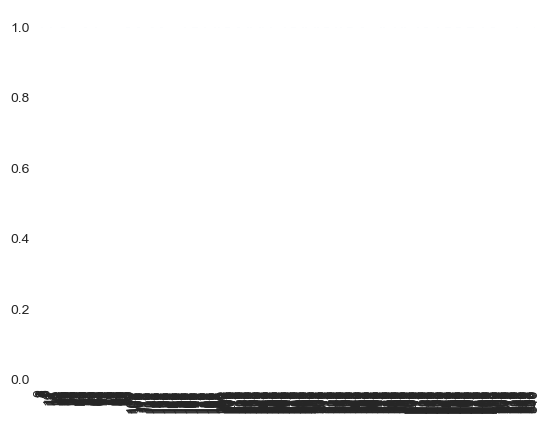

In [5]:
df['target'].plot(kind="bar")

In [16]:
df=df.apply(pd.to_numeric,errors='coerce')
df.fillna(0,inplace=True)

In [17]:
x=df.iloc[:,:-1]
y=df["target"]
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: target, Length: 541, dtype: int64


In [18]:
cols=x.columns
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=cols)
x

FollicleNoL  FollicleNoR     Cycle         A       Age    Weight  \
0      -0.740617    -0.821471 -0.621534 -0.603128 -0.634606 -1.364770   
1      -0.740617    -0.370287 -0.621534 -0.695032  0.845230  0.486731   
2       1.626032     1.885630 -0.621534  0.172951  0.290291  0.831618   
3      -0.977282    -1.047063 -0.621534 -0.747792  1.030210  0.486731   
4      -0.740617    -0.595879 -0.621534 -0.570791 -1.189545 -0.693147   
..           ...          ...       ...       ...       ...       ...   
536    -1.213947    -1.498246 -0.621534 -0.666099  0.660251 -0.874666   
537     0.679373     0.080896 -0.621534 -0.002348 -0.264647  0.323363   
538    -1.213947    -1.498246 -0.621534 -0.325714  0.845230 -0.511627   
539     0.206043    -0.144696  1.597936 -0.070425 -0.819586 -0.874666   
540     0.679373     0.757671  1.597936  2.448426 -1.559504  2.029648   

     Cyclelength  AvgFsizeL       BMI     Waist        MS  AvgFsizeR  \
0       0.039681   0.836776 -1.236018 -1.068864 -0.140514   0.768537   
1       0.039681  -0.005083  0.146227 -0.512314  0.693245  -0.437816   
2       0.039681   0.836776  0.244959  0.600786  0.484805   1.371714   
3       0.039681  -0.005083  1.331009  0.600786 -0.765832  -0.437816   
4       0.039681   0.275536 -1.038555 -1.068864 -1.391151  -0.437816   
..           ...        ...       ...       ...       ...        ...   
536     0.039681   0.696466 -1.433482 -2.181964  0.067926  -1.644169   
537     0.039681   1.117396  0.244959 -0.512314 -0.765832   0.768537   
538     0.710533   0.836776 -0.224017 -1.625414  0.067926  -1.945757   
539    -1.972877   0.836776 -0.520213 -2.181964 -1.182712   0.165361   
540     1.381386   1.117396  1.429740  3.383535 -1.182712   0.768537   

          Hip  Endometrium  Weightgain  hairgrowth  Skindarkening  Hairloss  \
0   -0.502644     0.011133   -0.778037   -0.613670      -0.665332 -0.909782   
1    0.001865    -2.207618   -0.778037   -0.613670      -0.665332 -0.909782   
2    0.506374     0.704493   -0.778037   -0.613670      -0.665332  1.099165   
3    1.010883    -0.451107   -0.778037   -0.613670      -0.665332 -0.909782   
4   -0.250389    -0.682227   -0.778037   -0.613670      -0.665332  1.099165   
..        ...          ...         ...         ...            ...       ...   
536 -2.520679    -0.820899   -0.778037   -0.613670      -0.665332 -0.909782   
537 -1.007153    -0.127539    1.285286   -0.613670      -0.665332 -0.909782   
538 -2.016171    -0.543555   -0.778037   -0.613670      -0.665332 -0.909782   
539 -2.520679     1.397853   -0.778037   -0.613670      -0.665332 -0.909782   
540  2.524410    -0.728451    1.285286    1.629541       1.503009  1.099165   

      Pimples  Fastfood  
0   -0.979870  0.969055  
1   -0.979870 -1.031933  
2    1.020544  0.969055  
3   -0.979870 -1.031933  
4   -0.979870 -1.031933  
..        ...       ...  
536 -0.979870 -1.031933  
537 -0.979870 -1.031933  
538 -0.979870 -1.031933  
539  1.020544 -1.031933  
540  1.020544  0.969055  

[541 rows x 20 columns]

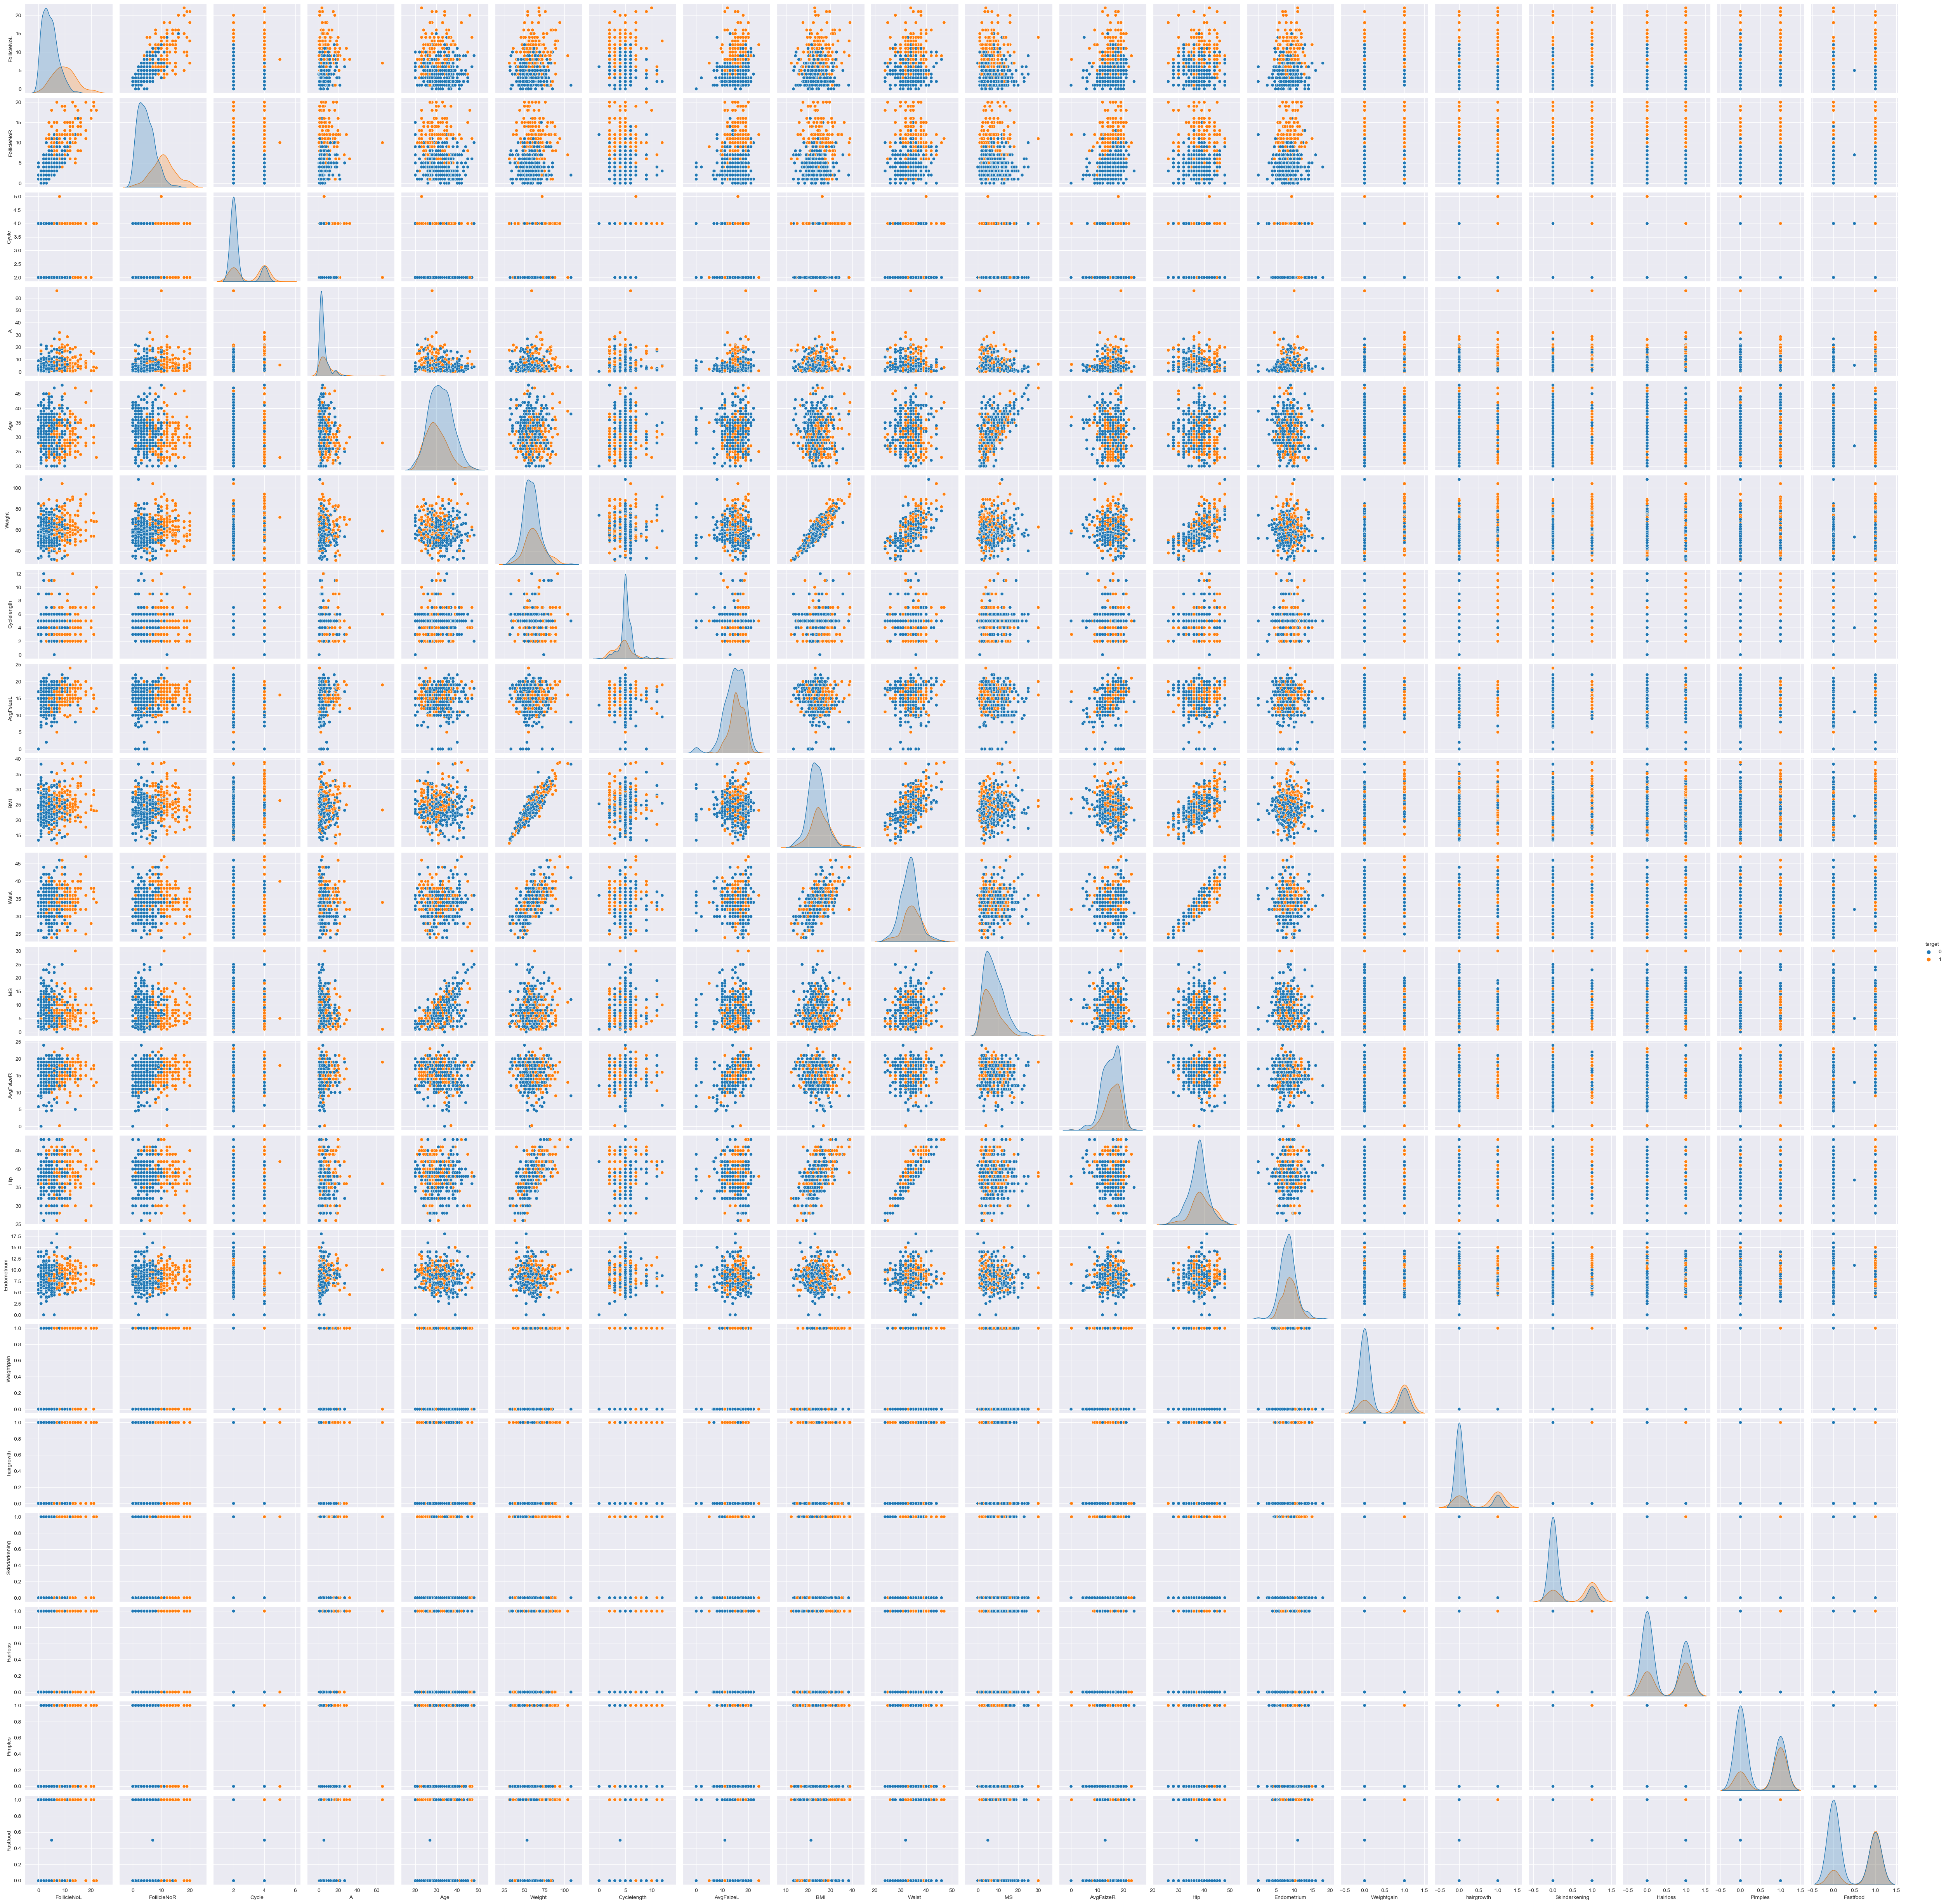

In [9]:
sns.pairplot(df,hue='target')

# Random Forest

In [81]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

x=df.iloc[:,:-1]
y=df["target"]

rfc=RandomForestClassifier(random_state=42)
n_estimators=[10,20,50,100,200,500,1000]

train_scores=[]
val_scores=[]

for n in n_estimators:
    rfc.set_params(n_estimators=n)
    rfc.fit(x,y)

    

In [83]:
train_scores.append(rfc.score(x,y))
val_scores.append(rfc.score(x,y))

In [85]:
optimal_n=n_estimators[val_scores.index(max(val_scores))]
print("Optimal number of estimators:",optimal_n)

Optimal number of estimators: 10


Text(0, 0.5, 'Testing Accuracy')

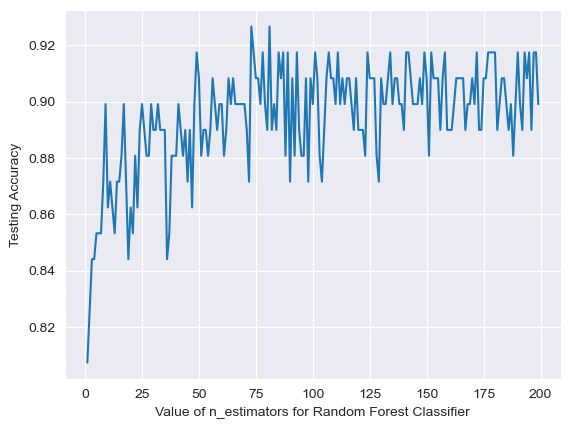

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [29]:
#Random Forest

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)



In [31]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="entropy",
                          max_depth=5,
                          min_samples_split=10,
                          random_state=5,
                          n_estimators=10)

In [32]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       n_estimators=10, random_state=5)

In [33]:
y_pred=clf.predict(x_test)

In [34]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

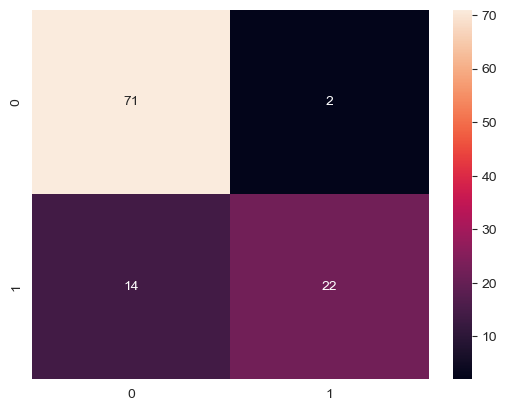

In [36]:
sns.heatmap(cf_matrix,annot=True)

In [37]:
from sklearn.metrics import accuracy_score
f1_score(y_test,y_pred)

0.7333333333333334

In [38]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.6625178677517155

<AxesSubplot:>

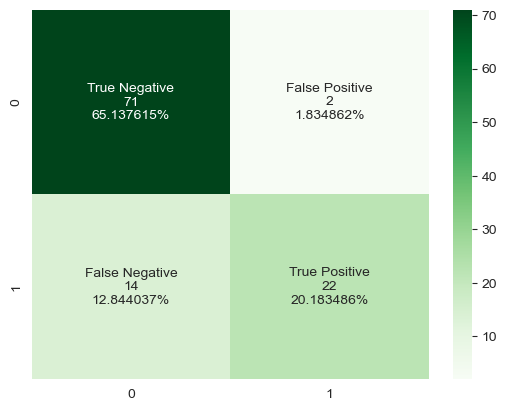

In [39]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [27]:
forest=RandomForestClassifier(random_state=1)
modelF=forest.fit(x_train,y_train)
y_predF=modelF.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.8532110091743119

In [32]:
type(x)

pandas.core.frame.DataFrame

In [33]:
n_estimators=[pd.DataFrame(x) in np.linspace(start=10,stop=80,num=20)]

max_features=['auto','sqrt']

max_depth=[2,4]

min_samples_split=[2,5]

min_samples_leaf=[1,2]

bootstrap=[True,False]

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [True], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [23]:
rf_Model=RandomForestClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [26]:
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [True]},
             verbose=2)

In [29]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': True}

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="entropy",
                          max_depth=2,
                          max_features="auto",
                          min_samples_split=5,
                          min_samples_leaf=1,
                          n_estimators=True,
                          random_state=5)

In [40]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=5,
                       n_estimators=True, random_state=5)

In [41]:
clf.feature_importances_

array([0.35167313, 0.27333212, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.37499475,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [42]:
y_pred=clf.predict(x_test)

In [43]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

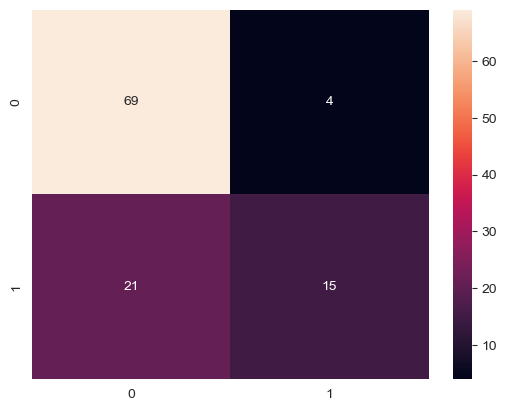

In [45]:
sns.heatmap(cf_matrix,annot=True)

In [46]:
from sklearn.metrics import accuracy_score
f1_score(y_test,y_pred)

0.5454545454545454

<AxesSubplot:>

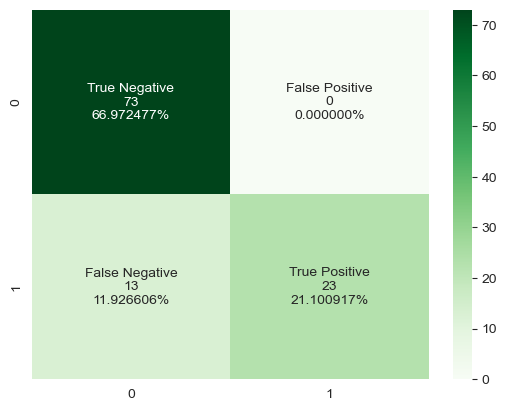

In [111]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [20]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.7566696898963531

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8899082568807339

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train,cv=10)

array([0.77272727, 0.90909091, 0.90697674, 0.97674419, 0.86046512,
       0.97674419, 0.8372093 , 0.93023256, 0.93023256, 0.86046512])

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        86
           1       0.64      1.00      0.78        23

    accuracy                           0.88       109
   macro avg       0.82      0.92      0.85       109
weighted avg       0.92      0.88      0.89       109



In [24]:
from sklearn.metrics import precision_score
print(precision_score(y_pred,y_test))

0.6666666666666666


In [113]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.7796610169491525


# Weighted Random Forest

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)


In [72]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="entropy",
                          max_depth=5,
                          min_samples_split=10,
                          random_state=5,class_weight='balanced')

In [73]:
clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=10, random_state=5)

In [74]:
y_pred=clf.predict(x_test)

In [75]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)

In [77]:
from sklearn.metrics import accuracy_score
f1_score(y_test,y_pred)

0.8484848484848485

# Coding for decision tree

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=4,stratify=y)


In [41]:
clf_entropy= DecisionTreeClassifier(criterion = "entropy",
                                    random_state=100, 
                                    max_depth=3, 
                                    min_samples_leaf=5)

In [42]:
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [43]:
y_pred_en= clf_entropy.predict(x_test)
print(y_pred_en)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]


In [125]:
print("Accuracy is", accuracy_score(y_test,y_pred_en)*100)

Accuracy is 83.4862385321101


In [27]:
print("Accuracy is", f1_score(y_test,y_pred_en)*100)

Accuracy is 68.96551724137932


In [31]:
cf_matrix=confusion_matrix(y_test,y_pred_en)
print(cf_matrix)

[[71  2]
 [16 20]]


In [44]:
print(classification_report(y_pred_en,y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        87
           1       0.56      0.91      0.69        22

    accuracy                           0.83       109
   macro avg       0.76      0.86      0.79       109
weighted avg       0.89      0.83      0.85       109



<AxesSubplot:>

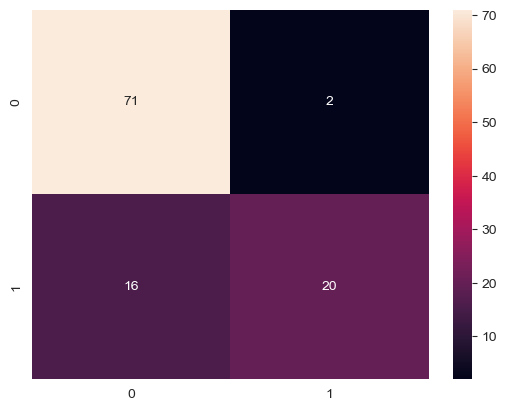

In [33]:
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

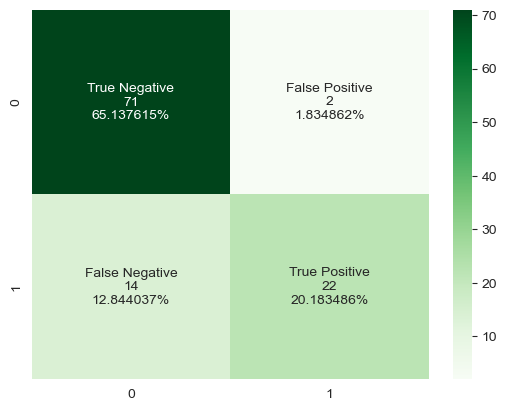

In [45]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [46]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred_en)

0.6188791035005574

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.shape,y.shape

((541, 20), (541,))

In [19]:
cols=x.columns
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=cols)
x

FollicleNoL  FollicleNoR     Cycle         A       Age    Weight  \
0      -0.740617    -0.821471 -0.621534 -0.603128 -0.634606 -1.364770   
1      -0.740617    -0.370287 -0.621534 -0.695032  0.845230  0.486731   
2       1.626032     1.885630 -0.621534  0.172951  0.290291  0.831618   
3      -0.977282    -1.047063 -0.621534 -0.747792  1.030210  0.486731   
4      -0.740617    -0.595879 -0.621534 -0.570791 -1.189545 -0.693147   
..           ...          ...       ...       ...       ...       ...   
536    -1.213947    -1.498246 -0.621534 -0.666099  0.660251 -0.874666   
537     0.679373     0.080896 -0.621534 -0.002348 -0.264647  0.323363   
538    -1.213947    -1.498246 -0.621534 -0.325714  0.845230 -0.511627   
539     0.206043    -0.144696  1.597936 -0.070425 -0.819586 -0.874666   
540     0.679373     0.757671  1.597936  2.448426 -1.559504  2.029648   

     Cyclelength  AvgFsizeL       BMI     Waist        MS  AvgFsizeR  \
0       0.039681   0.836776 -1.236018 -1.068864 -0.140514   0.768537   
1       0.039681  -0.005083  0.146227 -0.512314  0.693245  -0.437816   
2       0.039681   0.836776  0.244959  0.600786  0.484805   1.371714   
3       0.039681  -0.005083  1.331009  0.600786 -0.765832  -0.437816   
4       0.039681   0.275536 -1.038555 -1.068864 -1.391151  -0.437816   
..           ...        ...       ...       ...       ...        ...   
536     0.039681   0.696466 -1.433482 -2.181964  0.067926  -1.644169   
537     0.039681   1.117396  0.244959 -0.512314 -0.765832   0.768537   
538     0.710533   0.836776 -0.224017 -1.625414  0.067926  -1.945757   
539    -1.972877   0.836776 -0.520213 -2.181964 -1.182712   0.165361   
540     1.381386   1.117396  1.429740  3.383535 -1.182712   0.768537   

          Hip  Endometrium  Weightgain  hairgrowth  Skindarkening  Hairloss  \
0   -0.502644     0.011133   -0.778037   -0.613670      -0.665332 -0.909782   
1    0.001865    -2.207618   -0.778037   -0.613670      -0.665332 -0.909782   
2    0.506374     0.704493   -0.778037   -0.613670      -0.665332  1.099165   
3    1.010883    -0.451107   -0.778037   -0.613670      -0.665332 -0.909782   
4   -0.250389    -0.682227   -0.778037   -0.613670      -0.665332  1.099165   
..        ...          ...         ...         ...            ...       ...   
536 -2.520679    -0.820899   -0.778037   -0.613670      -0.665332 -0.909782   
537 -1.007153    -0.127539    1.285286   -0.613670      -0.665332 -0.909782   
538 -2.016171    -0.543555   -0.778037   -0.613670      -0.665332 -0.909782   
539 -2.520679     1.397853   -0.778037   -0.613670      -0.665332 -0.909782   
540  2.524410    -0.728451    1.285286    1.629541       1.503009  1.099165   

      Pimples  Fastfood  
0   -0.979870  0.969055  
1   -0.979870 -1.031933  
2    1.020544  0.969055  
3   -0.979870 -1.031933  
4   -0.979870 -1.031933  
..        ...       ...  
536 -0.979870 -1.031933  
537 -0.979870 -1.031933  
538 -0.979870 -1.031933  
539  1.020544 -1.031933  
540  1.020544  0.969055  

[541 rows x 20 columns]

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)


In [22]:
log_reg=LogisticRegression(solver='saga', random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='saga')

In [23]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [24]:
accuracy_score(y_test,y_pred)

0.8990825688073395

In [40]:
f1_score(y_test,y_pred)

0.835820895522388

In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        78
           1       0.78      0.90      0.84        31

    accuracy                           0.90       109
   macro avg       0.87      0.90      0.88       109
weighted avg       0.91      0.90      0.90       109



In [53]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[70  3]
 [ 8 28]]


<AxesSubplot:>

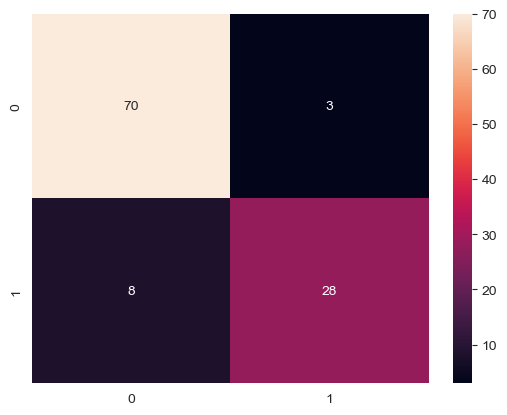

In [54]:
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

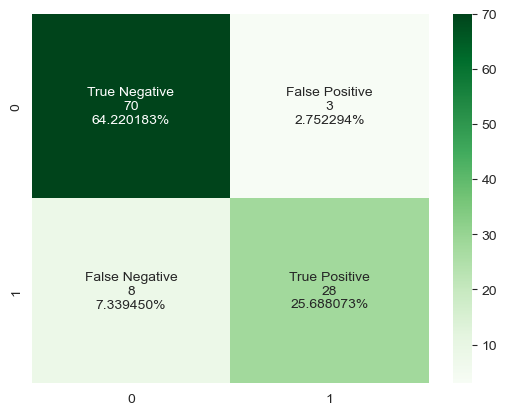

In [55]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [56]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.7680058431823186

# Balanced Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

lr_balanced=LogisticRegression(class_weight='balanced',random_state=0,n_jobs=-1)
lr_balanced_model=lr_balanced.fit(x_train,y_train)
lr_balanced_prediction=lr_balanced_model.predict(x_test)

#Check the model performance
print(classification_report(y_test,lr_balanced_prediction))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        73
           1       0.81      0.83      0.82        36

    accuracy                           0.88       109
   macro avg       0.86      0.87      0.87       109
weighted avg       0.88      0.88      0.88       109



In [64]:
f1_score(y_test,lr_balanced_prediction)

0.8219178082191781

In [65]:
cf_matrix=confusion_matrix(y_test,lr_balanced_prediction)
print(cf_matrix)

[[66  7]
 [ 6 30]]


# CODE FOR KNN

In [57]:
x.shape,y.shape

((541, 20), (541,))

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)


In [59]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((432, 20), (432,), (109, 20), (109,))

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    
    error_rate.append(np.mean(pred_i!=y_test))

D:\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Text(0, 0.5, 'Error Rate')

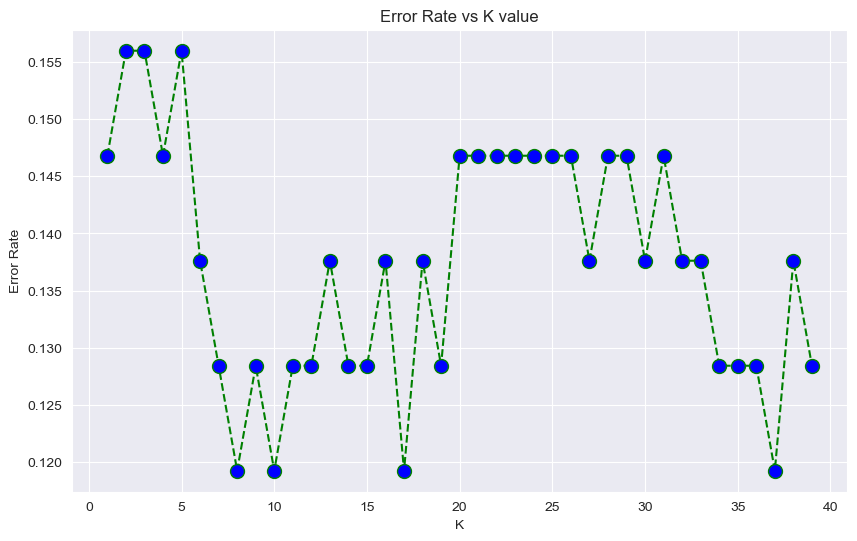

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K value')

plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
from sklearn.neighbors import KNeighborsClassifier
Classifier=KNeighborsClassifier(n_neighbors=8)
Classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [62]:
y_predict=Classifier.predict(x_test)

D:\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91        73
           1       0.96      0.64      0.77        36

    accuracy                           0.87       109
   macro avg       0.90      0.81      0.84       109
weighted avg       0.88      0.87      0.86       109

[[72  1]
 [13 23]]


In [64]:
f1_score(y_test,y_predict)

0.7666666666666666

In [65]:
cf_matrix=confusion_matrix(y_test,y_predict)
print(cf_matrix)

[[72  1]
 [13 23]]


<AxesSubplot:>

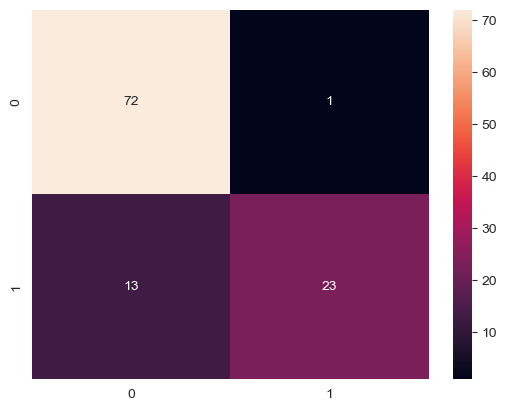

In [66]:
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

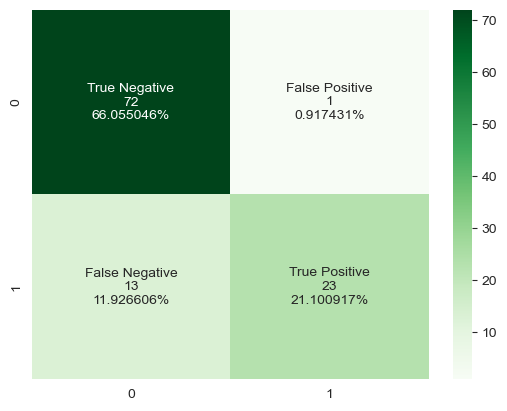

In [67]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [68]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.7095937788240343

# code for LDA

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)


In [70]:
clf = LDA()
clf.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [71]:
clf.score(x_train,y_train)

0.9189814814814815

In [72]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        73
           1       0.93      0.75      0.83        36

    accuracy                           0.90       109
   macro avg       0.91      0.86      0.88       109
weighted avg       0.90      0.90      0.90       109



In [74]:
accuracy_score(y_test,y_pred)

0.8990825688073395

In [75]:
f1_score(y_test,y_pred)

0.8307692307692308

In [76]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[71  2]
 [ 9 27]]


<AxesSubplot:>

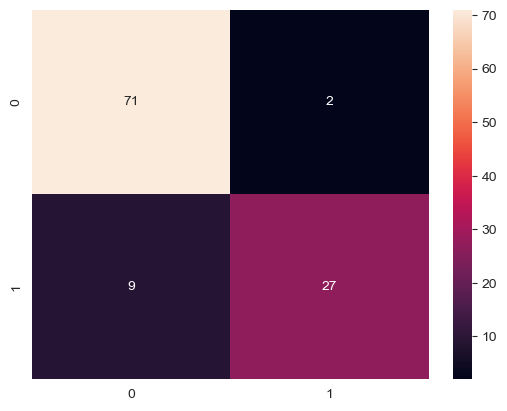

In [77]:
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

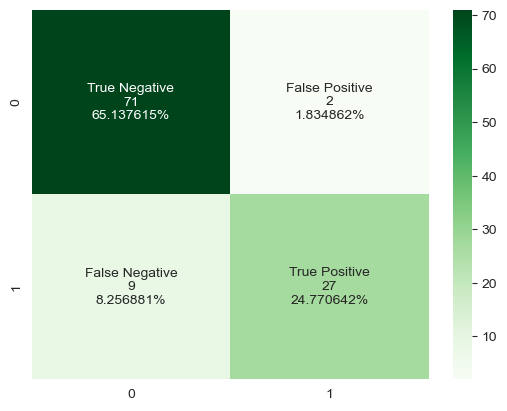

In [78]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [79]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.769074287570197

In [100]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred)

In [101]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc


0.8613013698630138

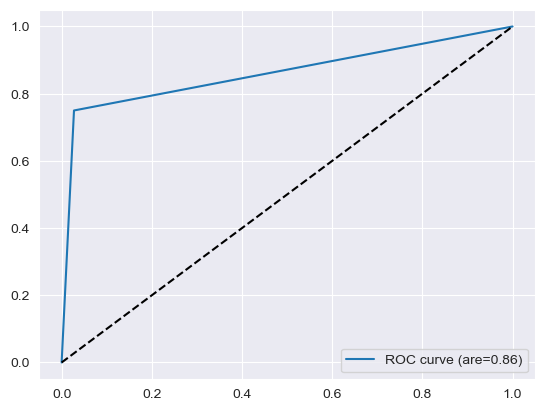

In [102]:
plt.clf()
plt.plot(fpr,tpr,label="ROC curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")


# code for naiver bayes:

In [53]:
GausNB=GaussianNB()
GausNB.fit(x_train,y_train)

GaussianNB()

In [54]:
y_pred=GausNB.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        73
           1       0.70      0.78      0.74        36

    accuracy                           0.82       109
   macro avg       0.79      0.81      0.80       109
weighted avg       0.82      0.82      0.82       109



In [55]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[61 12]
 [ 8 28]]


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        73
           1       0.70      0.78      0.74        36

    accuracy                           0.82       109
   macro avg       0.79      0.81      0.80       109
weighted avg       0.82      0.82      0.82       109



In [57]:
f1_score(y_test,y_pred)

0.7368421052631577

<AxesSubplot:>

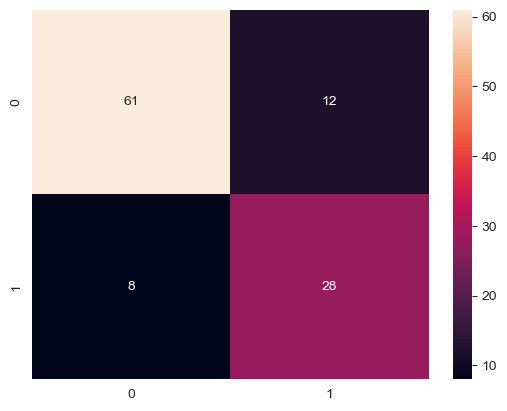

In [107]:
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

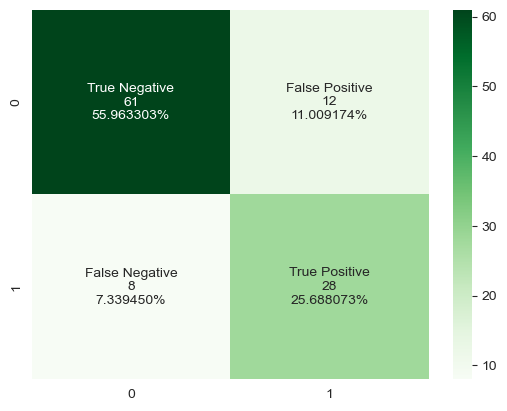

In [108]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [109]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.5985463902716442

In [110]:
#SVM

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)

# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='rbf',random_state=0) 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(random_state=0)

In [59]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        73
           1       0.90      0.78      0.84        36

    accuracy                           0.90       109
   macro avg       0.90      0.87      0.88       109
weighted avg       0.90      0.90      0.90       109



In [61]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[70  3]
 [ 8 28]]


In [62]:
f1_score(y_test,y_pred)

0.835820895522388

<AxesSubplot:>

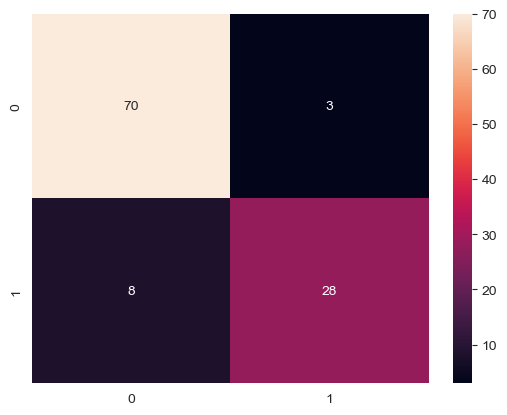

In [115]:
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

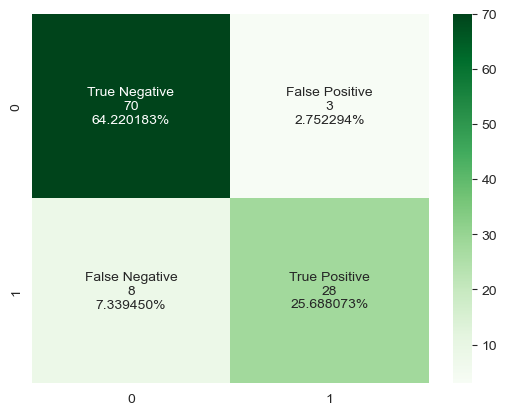

In [116]:
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [117]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.7680058431823186